In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats

In [2]:
cross_seeds = pd.read_csv('only-seeds-kldivs.csv')
cross_seeds

model_1  \
0    models/paraphrase-captioning-translation/multi...   
1    models/paraphrase-captioning-translation/multi...   
2    models/paraphrase-captioning-translation/multi...   
3    models/paraphrase-captioning-translation/multi...   
4    models/paraphrase-captioning-translation/multi...   
..                                                 ...   
571  models/paraphrase-captioning/multimodal-downsa...   
572  models/paraphrase-captioning/multimodal-downsa...   
573  models/paraphrase-captioning/multimodal-downsa...   
574  models/paraphrase-captioning/multimodal-downsa...   
575  models/paraphrase-captioning/multimodal-downsa...   

                                               model_2      kldiv  
0    models/paraphrase-captioning-translation/multi...  21.061835  
1    models/paraphrase-captioning-translation/multi...  23.955808  
2    models/paraphrase-captioning-translation/multi...  23.140770  
3    models/paraphrase-captioning-translation/multi...  29.327256  
4    models/paraphrase-captioning-translation/multi...  34.541651  
..                                                 ...        ...  
571  models/paraphrase-captioning/multimodal-downsa...  22.204612  
572  models/paraphrase-captioning/multimodal-downsa...  13.982406  
573  models/paraphrase-captioning/multimodal-downsa...  12.794134  
574  models/paraphrase-captioning/multimodal-downsa...  14.219005  
575  models/paraphrase-captioning/multimodal-downsa...  14.809637  

[576 rows x 3 columns]

In [3]:
cross_impls = pd.read_csv('all-but-seeds-kldivs.csv')
cross_impls

model_1  \
0      models/paraphrase-captioning-translation/multi...   
1      models/paraphrase-captioning-translation/multi...   
2      models/paraphrase-captioning-translation/multi...   
3      models/paraphrase-captioning-translation/multi...   
4      models/paraphrase-captioning-translation/multi...   
...                                                  ...   
20587  models/paraphrase-captioning/multimodal-downsa...   
20588  models/paraphrase-captioning/multimodal-downsa...   
20589  models/paraphrase-captioning/multimodal-downsa...   
20590  models/paraphrase-captioning/multimodal-downsa...   
20591  models/paraphrase-captioning/multimodal-downsa...   

                                                 model_2      kldiv  
0      models/paraphrase-captioning-translation/multi...  17.847273  
1      models/paraphrase-captioning-translation/multi...  16.086286  
2      models/paraphrase-captioning-translation/multi...  17.603144  
3      models/paraphrase-captioning-translation/multi...  17.727970  
4      models/paraphrase-captioning-translation/multi...  44.581495  
...                                                  ...        ...  
20587  models/paraphrase-captioning/multimodal-downsa...  36.290131  
20588  models/paraphrase-captioning/multimodal-downsa...  38.445436  
20589  models/paraphrase-captioning/multimodal-downsa...  30.280342  
20590  models/paraphrase-captioning/multimodal-downsa...  26.518412  
20591  models/paraphrase-captioning/multimodal-downsa...  34.011972  

[20592 rows x 3 columns]

In [4]:
max_same = cross_seeds.groupby('model_1')['kldiv'].max().reset_index().sort_values(by='model_1').rename(columns={'kldiv':'max_same'})
max_same

model_1   max_same
0    models/captioning/downsample-n-0.5/1/captionin...  13.710009
1    models/captioning/downsample-n-0.5/1/captionin...  26.155225
2    models/captioning/downsample-n-0.5/1/captionin...  37.457221
3    models/captioning/downsample-n-0.5/1/captionin...  38.519166
4    models/captioning/downsample-n-0.5/1/captionin...  40.351092
..                                                 ...        ...
139  models/translation/downsample-n-none/1/transla...  22.658576
140  models/translation/downsample-n-none/1/transla...  23.734529
141  models/translation/downsample-n-none/1/transla...  27.000500
142  models/translation/downsample-n-none/1/transla...  26.793870
143  models/translation/downsample-n-none/1/transla...  18.989174

[144 rows x 2 columns]

In [5]:
min_diff = cross_impls.groupby('model_1')['kldiv'].min().reset_index().sort_values(by='model_1').rename(columns={'kldiv':'min_diff'})
min_diff

model_1   min_diff
0    models/captioning/downsample-n-0.5/1/captionin...  13.490406
1    models/captioning/downsample-n-0.5/1/captionin...  17.876644
2    models/captioning/downsample-n-0.5/1/captionin...  15.696626
3    models/captioning/downsample-n-0.5/1/captionin...  16.101703
4    models/captioning/downsample-n-0.5/1/captionin...  16.854261
..                                                 ...        ...
139  models/translation/downsample-n-none/1/transla...  11.495760
140  models/translation/downsample-n-none/1/transla...  11.063542
141  models/translation/downsample-n-none/1/transla...  11.323016
142  models/translation/downsample-n-none/1/transla...  11.022356
143  models/translation/downsample-n-none/1/transla...  15.606827

[144 rows x 2 columns]

In [6]:
min_v_max = pd.merge(min_diff, max_same)
min_v_max

model_1   min_diff   max_same
0    models/captioning/downsample-n-0.5/1/captionin...  13.490406  13.710009
1    models/captioning/downsample-n-0.5/1/captionin...  17.876644  26.155225
2    models/captioning/downsample-n-0.5/1/captionin...  15.696626  37.457221
3    models/captioning/downsample-n-0.5/1/captionin...  16.101703  38.519166
4    models/captioning/downsample-n-0.5/1/captionin...  16.854261  40.351092
..                                                 ...        ...        ...
139  models/translation/downsample-n-none/1/transla...  11.495760  22.658576
140  models/translation/downsample-n-none/1/transla...  11.063542  23.734529
141  models/translation/downsample-n-none/1/transla...  11.323016  27.000500
142  models/translation/downsample-n-none/1/transla...  11.022356  26.793870
143  models/translation/downsample-n-none/1/transla...  15.606827  18.989174

[144 rows x 3 columns]

In [19]:
def shortform(model_name, as_str=False, lowercase_monotask=False):
    comps = model_name.split('/')
    tasks = ''.join(c[0].upper() for c in comps[1].split('-'))
    if lowercase_monotask and len(tasks) == 1:
        tasks = '_' + tasks.lower() + '_'
    noise = comps[2].split('-')[-1]
    if noise == 'none':
        noise = '0.0'
    seed = comps[-2]
    *_, mode, epoch = comps[-1].split('_')
    epoch = epoch[1:-3]
    if as_str:
        if lowercase_monotask:
            return '/'.join([tasks, noise, epoch])
        else:
            return '/'.join([tasks, noise, mode, epoch, seed])
    return [tasks, float(noise), mode, int(epoch)]

In [8]:
infos = min_v_max.model_1.apply(shortform)
for idx, colname in enumerate(['tasks', 'noise', 'mode', 'epoch']):
    min_v_max[colname] = infos.apply(lambda info: info[idx])
min_v_max

model_1   min_diff   max_same  \
0    models/captioning/downsample-n-0.5/1/captionin...  13.490406  13.710009   
1    models/captioning/downsample-n-0.5/1/captionin...  17.876644  26.155225   
2    models/captioning/downsample-n-0.5/1/captionin...  15.696626  37.457221   
3    models/captioning/downsample-n-0.5/1/captionin...  16.101703  38.519166   
4    models/captioning/downsample-n-0.5/1/captionin...  16.854261  40.351092   
..                                                 ...        ...        ...   
139  models/translation/downsample-n-none/1/transla...  11.495760  22.658576   
140  models/translation/downsample-n-none/1/transla...  11.063542  23.734529   
141  models/translation/downsample-n-none/1/transla...  11.323016  27.000500   
142  models/translation/downsample-n-none/1/transla...  11.022356  26.793870   
143  models/translation/downsample-n-none/1/transla...  15.606827  18.989174   

    tasks  noise  mode  epoch  
0       C    0.5  none      0  
1       C    0.5  none     10  
2       C    0.5  none     15  
3       C    0.5  none     20  
4       C    0.5  none     25  
..    ...    ...   ...    ...  
139     T    0.0  none     10  
140     T    0.0  none     15  
141     T    0.0  none     20  
142     T    0.0  none     25  
143     T    0.0  none      5  

[144 rows x 7 columns]

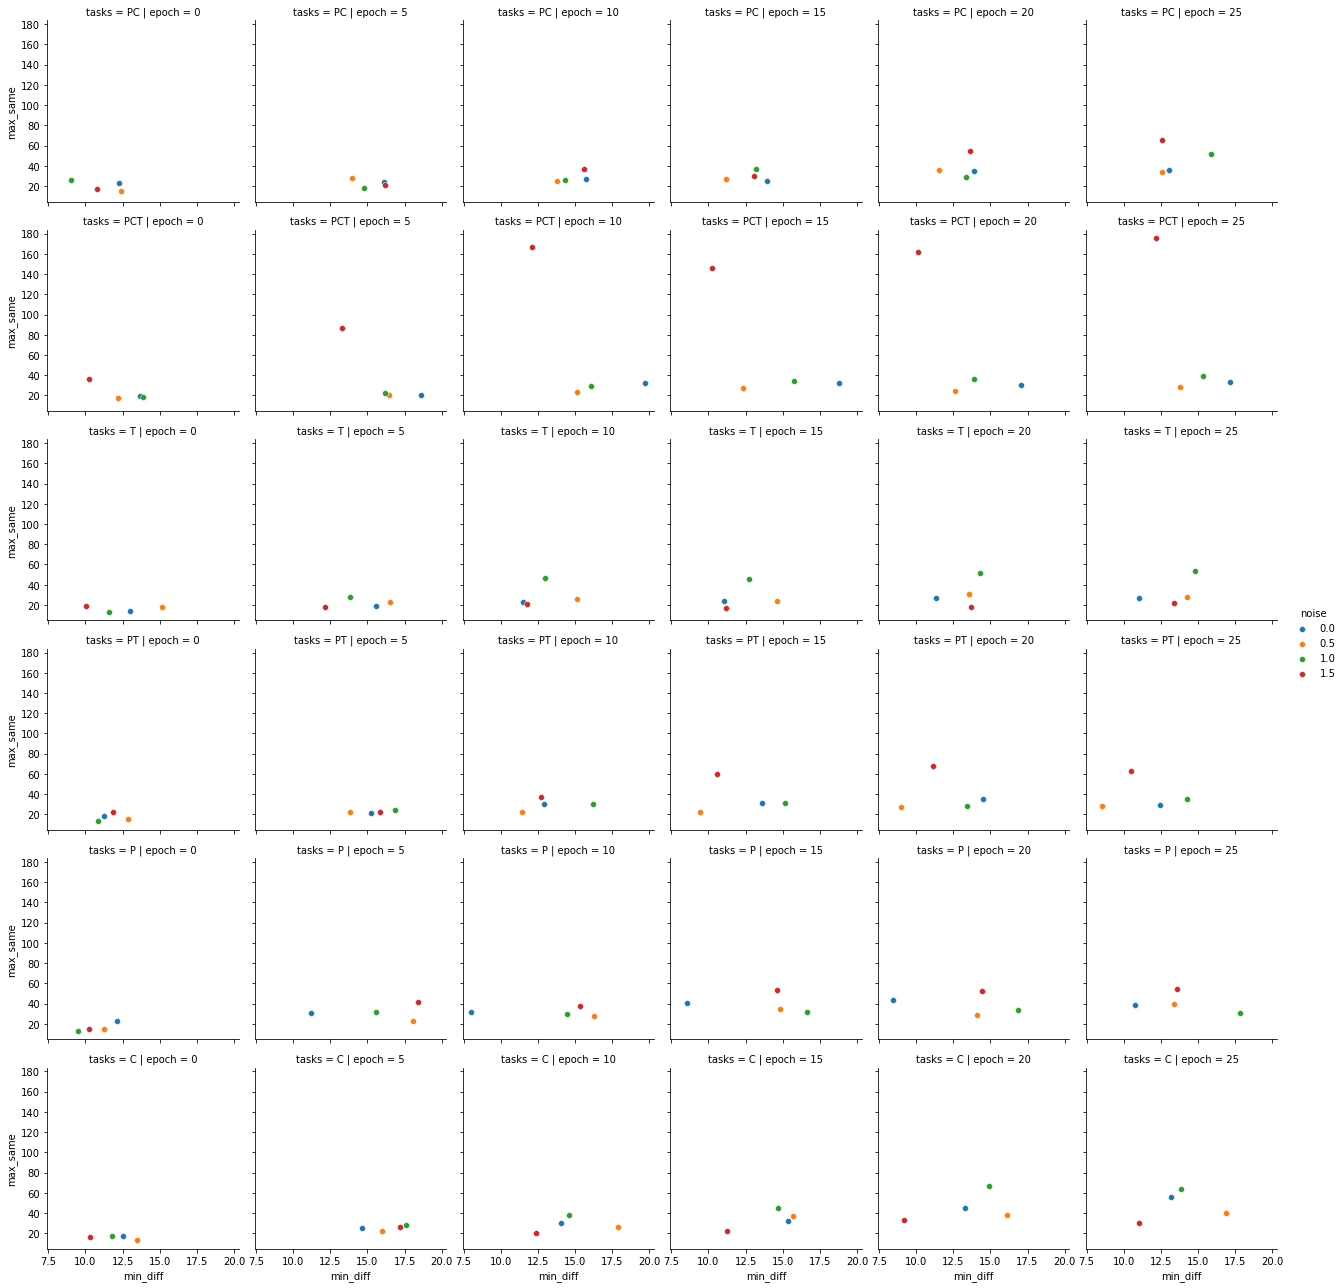

In [9]:
g = sns.FacetGrid(data=min_v_max.sort_values(by='noise'), row='tasks', col='epoch', hue='noise')
g.map(sns.scatterplot, 'min_diff', 'max_same')
g.add_legend()

In [10]:
cross_seeds['model_2'] = cross_seeds.model_2.str.split('/').apply(lambda s: f'seed_{s[3]}')

In [11]:
cross_impls['model_2'] = cross_impls.model_2.apply(lambda s: shortform(s, as_str=True, lowercase_monotask=True))

In [12]:
all_res = pd.concat([cross_impls, cross_seeds])
all_res['model_1'] = all_res.model_1.apply(lambda s: shortform(s, as_str=True, lowercase_monotask=True))
all_res

model_1     model_2      kldiv
0    PCT/1.0/10  PCT/1.0/25  17.847273
1    PCT/1.0/10  PCT/1.0/15  16.086286
2    PCT/1.0/10   PCT/1.0/5  17.603144
3    PCT/1.0/10  PCT/1.0/20  17.727970
4    PCT/1.0/10   PCT/1.0/0  44.581495
..          ...         ...        ...
571   PC/0.5/15      seed_3  22.204612
572    PC/0.5/0      seed_5  13.982406
573    PC/0.5/0      seed_2  12.794134
574    PC/0.5/0      seed_4  14.219005
575    PC/0.5/0      seed_3  14.809637

[21168 rows x 3 columns]

In [39]:
shortlisted = pd.read_csv('all-kldivs.shortlist.csv')
shortlisted['model_1'] = shortlisted.model_1.apply(lambda s: shortform(s, as_str=True))
shortlisted['model_2'] = shortlisted.model_2.apply(lambda s: shortform(s, as_str=True))
shortlisted = shortlisted.sort_values(by=['model_1', 'model_2']).reset_index(drop=True)
shortlisted['same task'] =  shortlisted.apply(lambda row: row['model_1'][0] == row['model_2'][0], axis=1)
shortlisted['task pair'] =  shortlisted.apply(lambda row: '/'.join(sorted([row['model_1'][0], row['model_2'][0]])), axis=1)
shortlisted

model_1          model_2    kl_div  agreement  same task  \
0      C/0.0/none/10/3  C/0.0/none/10/4  7.682822   0.694416       True   
1      C/0.0/none/10/3  C/0.0/none/10/5  7.767683   0.692575       True   
2      C/0.0/none/10/3  C/0.0/none/20/1  8.302351   0.689124       True   
3      C/0.0/none/10/3  C/0.0/none/20/2  8.025766   0.699494       True   
4      C/0.0/none/10/3  C/0.0/none/20/3  6.543558   0.706675       True   
...                ...              ...       ...        ...        ...   
14275   T/1.5/none/5/5  T/1.5/none/20/5  8.909826   0.683157       True   
14276   T/1.5/none/5/5   T/1.5/none/5/1  7.156362   0.711126       True   
14277   T/1.5/none/5/5   T/1.5/none/5/2  7.015668   0.703832       True   
14278   T/1.5/none/5/5   T/1.5/none/5/3  7.043469   0.698886       True   
14279   T/1.5/none/5/5   T/1.5/none/5/4  6.753137   0.719768       True   

      task pair  
0           C/C  
1           C/C  
2           C/C  
3           C/C  
4           C/C  
...         ...  
14275       T/T  
14276       T/T  
14277       T/T  
14278       T/T  
14279       T/T  

[14280 rows x 6 columns]

<AxesSubplot:xlabel='model_2', ylabel='model_1'>

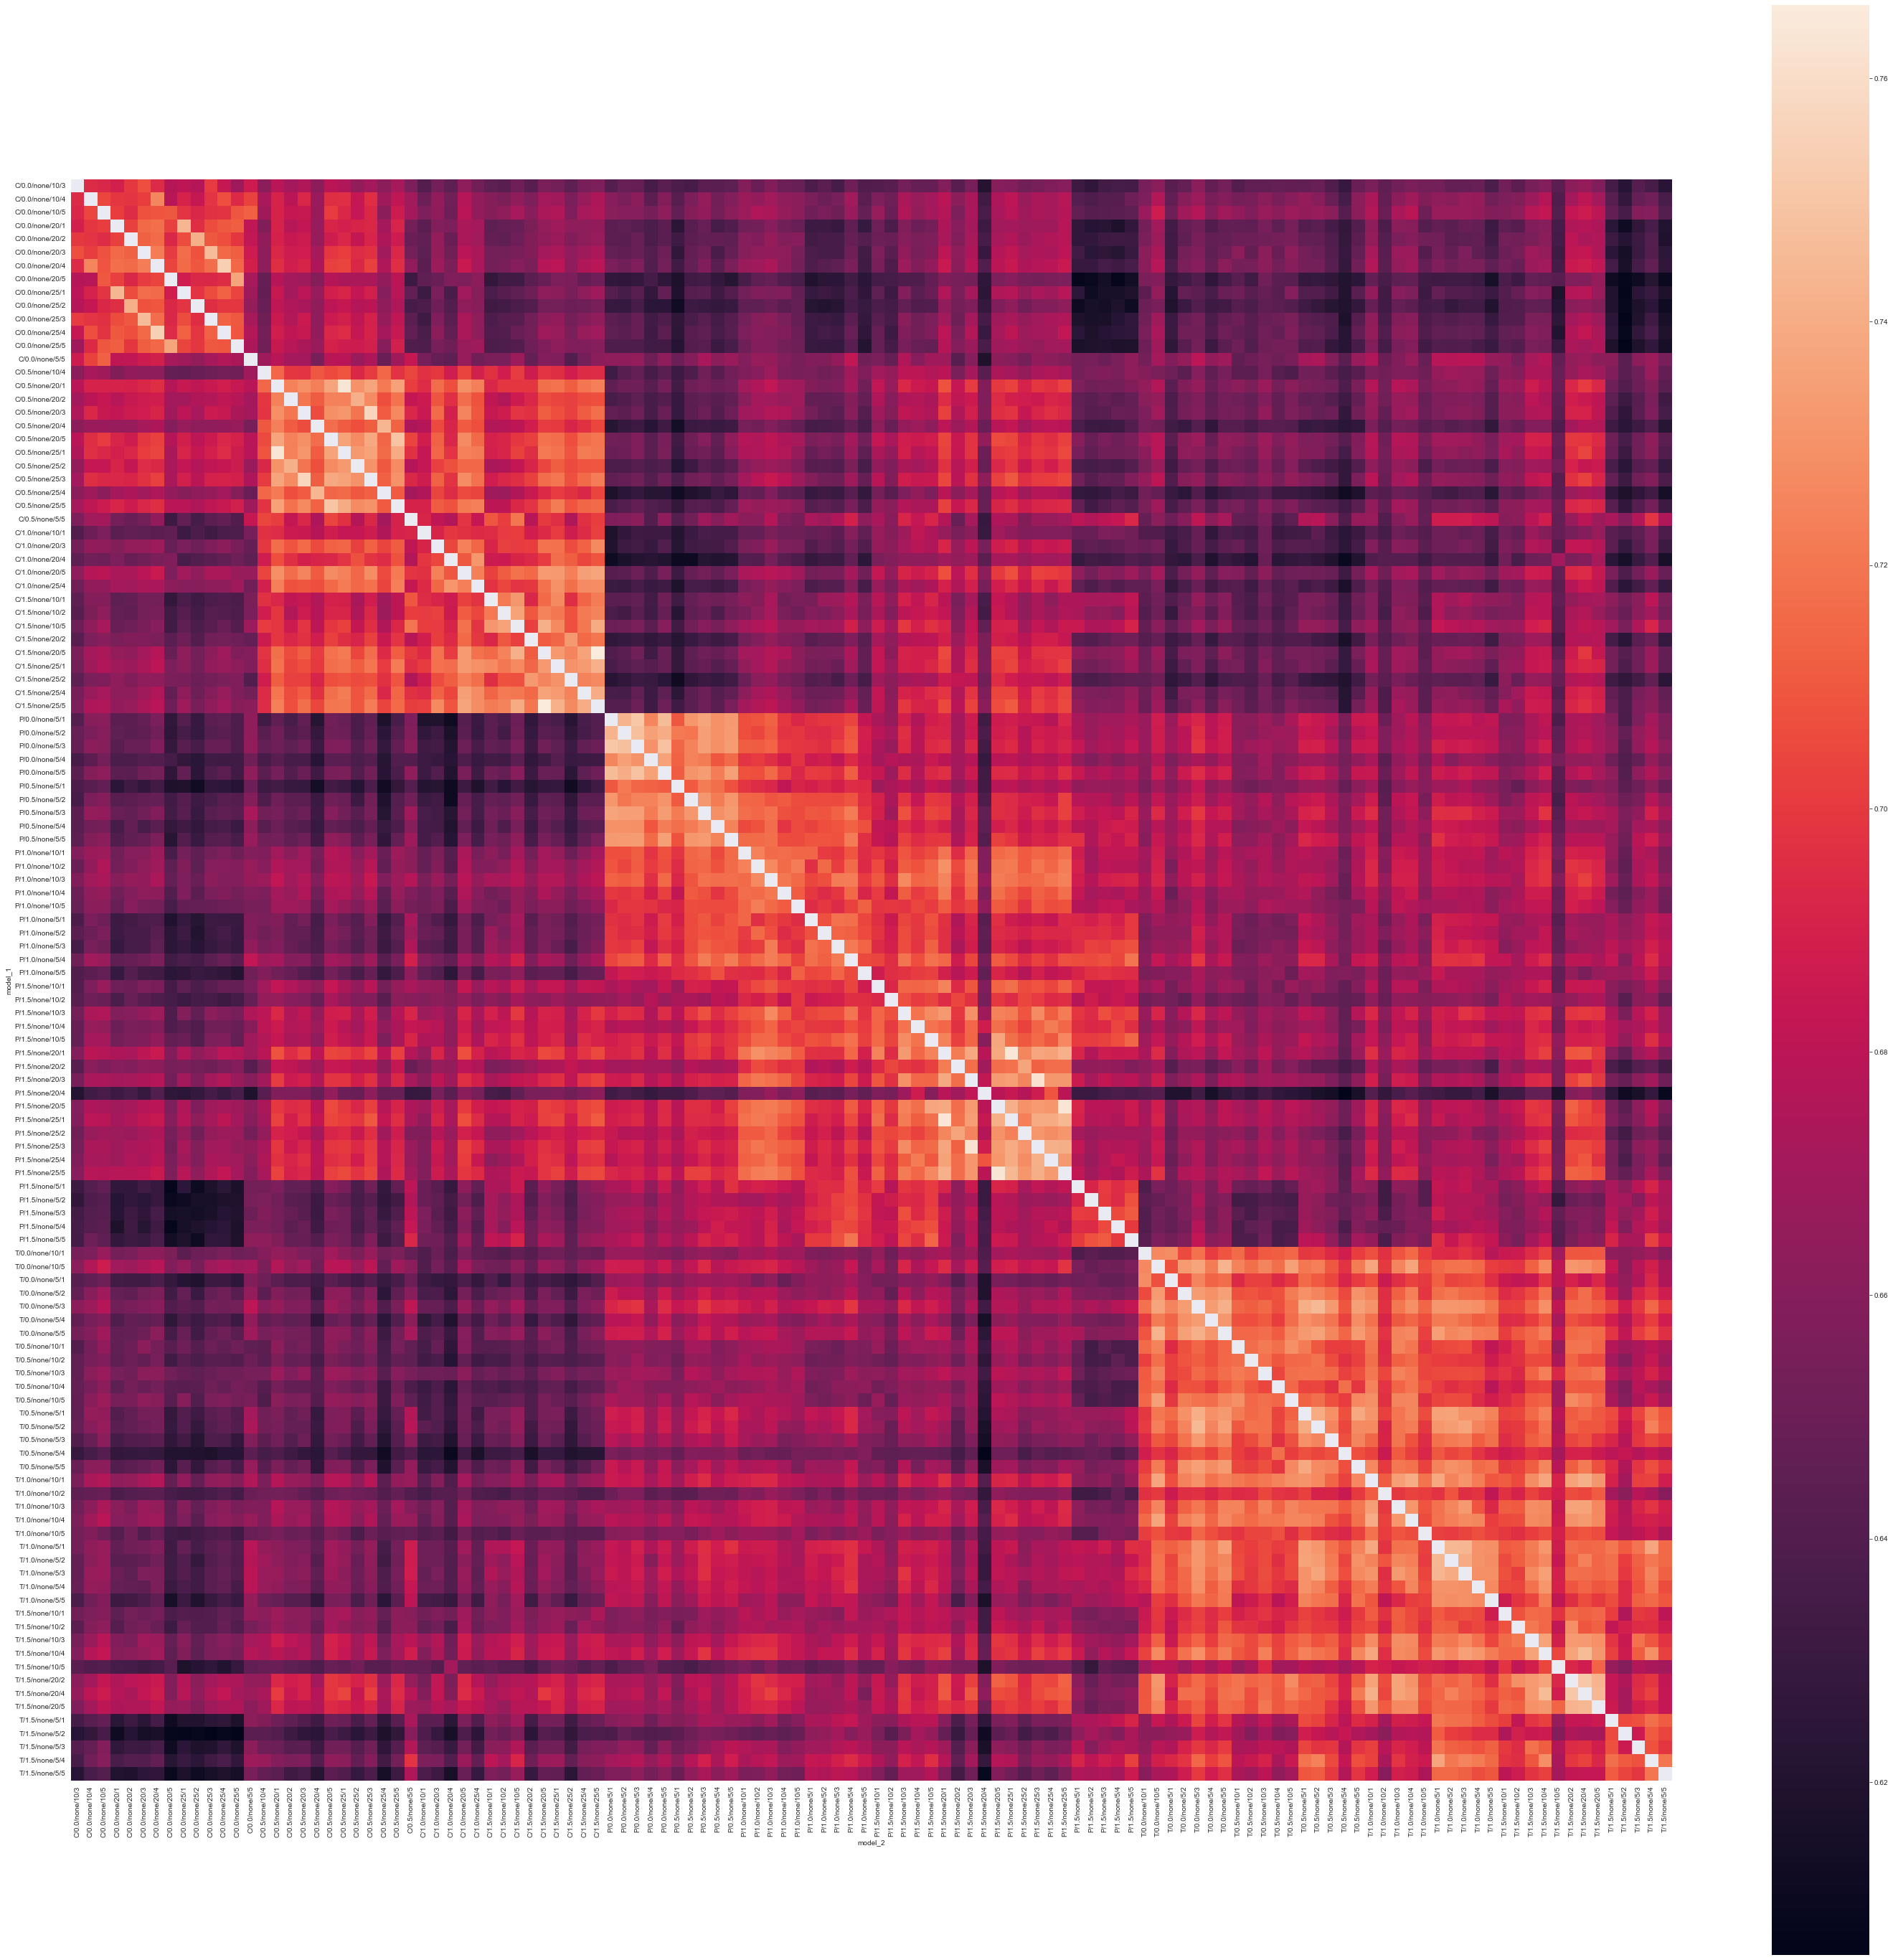

In [26]:
sns.set({'figure.figsize':(50, 50)})

sns.heatmap(
    shortlisted.pivot(index='model_1', columns='model_2', values='agreement'),
    #annot=True,
    #cbar=False,
    square=True,
)

<AxesSubplot:xlabel='agreement', ylabel='Density'>

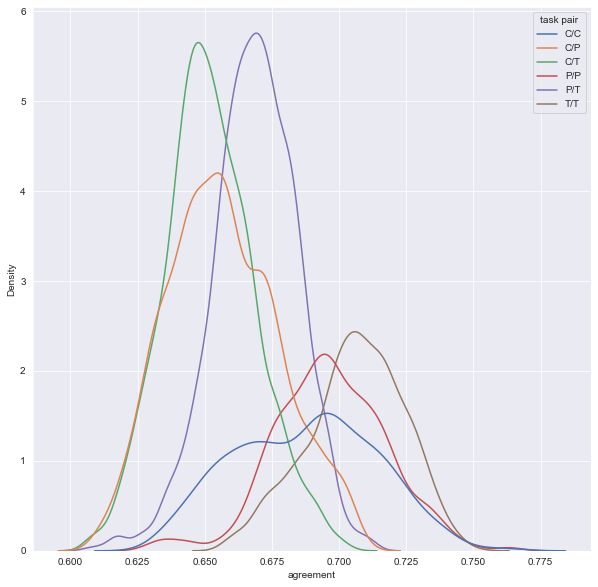

In [45]:
sns.set({'figure.figsize':(10, 10)})
sns.kdeplot(data=shortlisted, x='agreement', hue='task pair')

In [36]:
import scipy.stats
scipy.stats.spearmanr(shortlisted.kl_div, shortlisted.agreement)

SpearmanrResult(correlation=-0.8866265346201425, pvalue=0.0)

In [ ]:
scipy.stats.mannwhitneyu()

<AxesSubplot:xlabel='model_2', ylabel='model_1'>

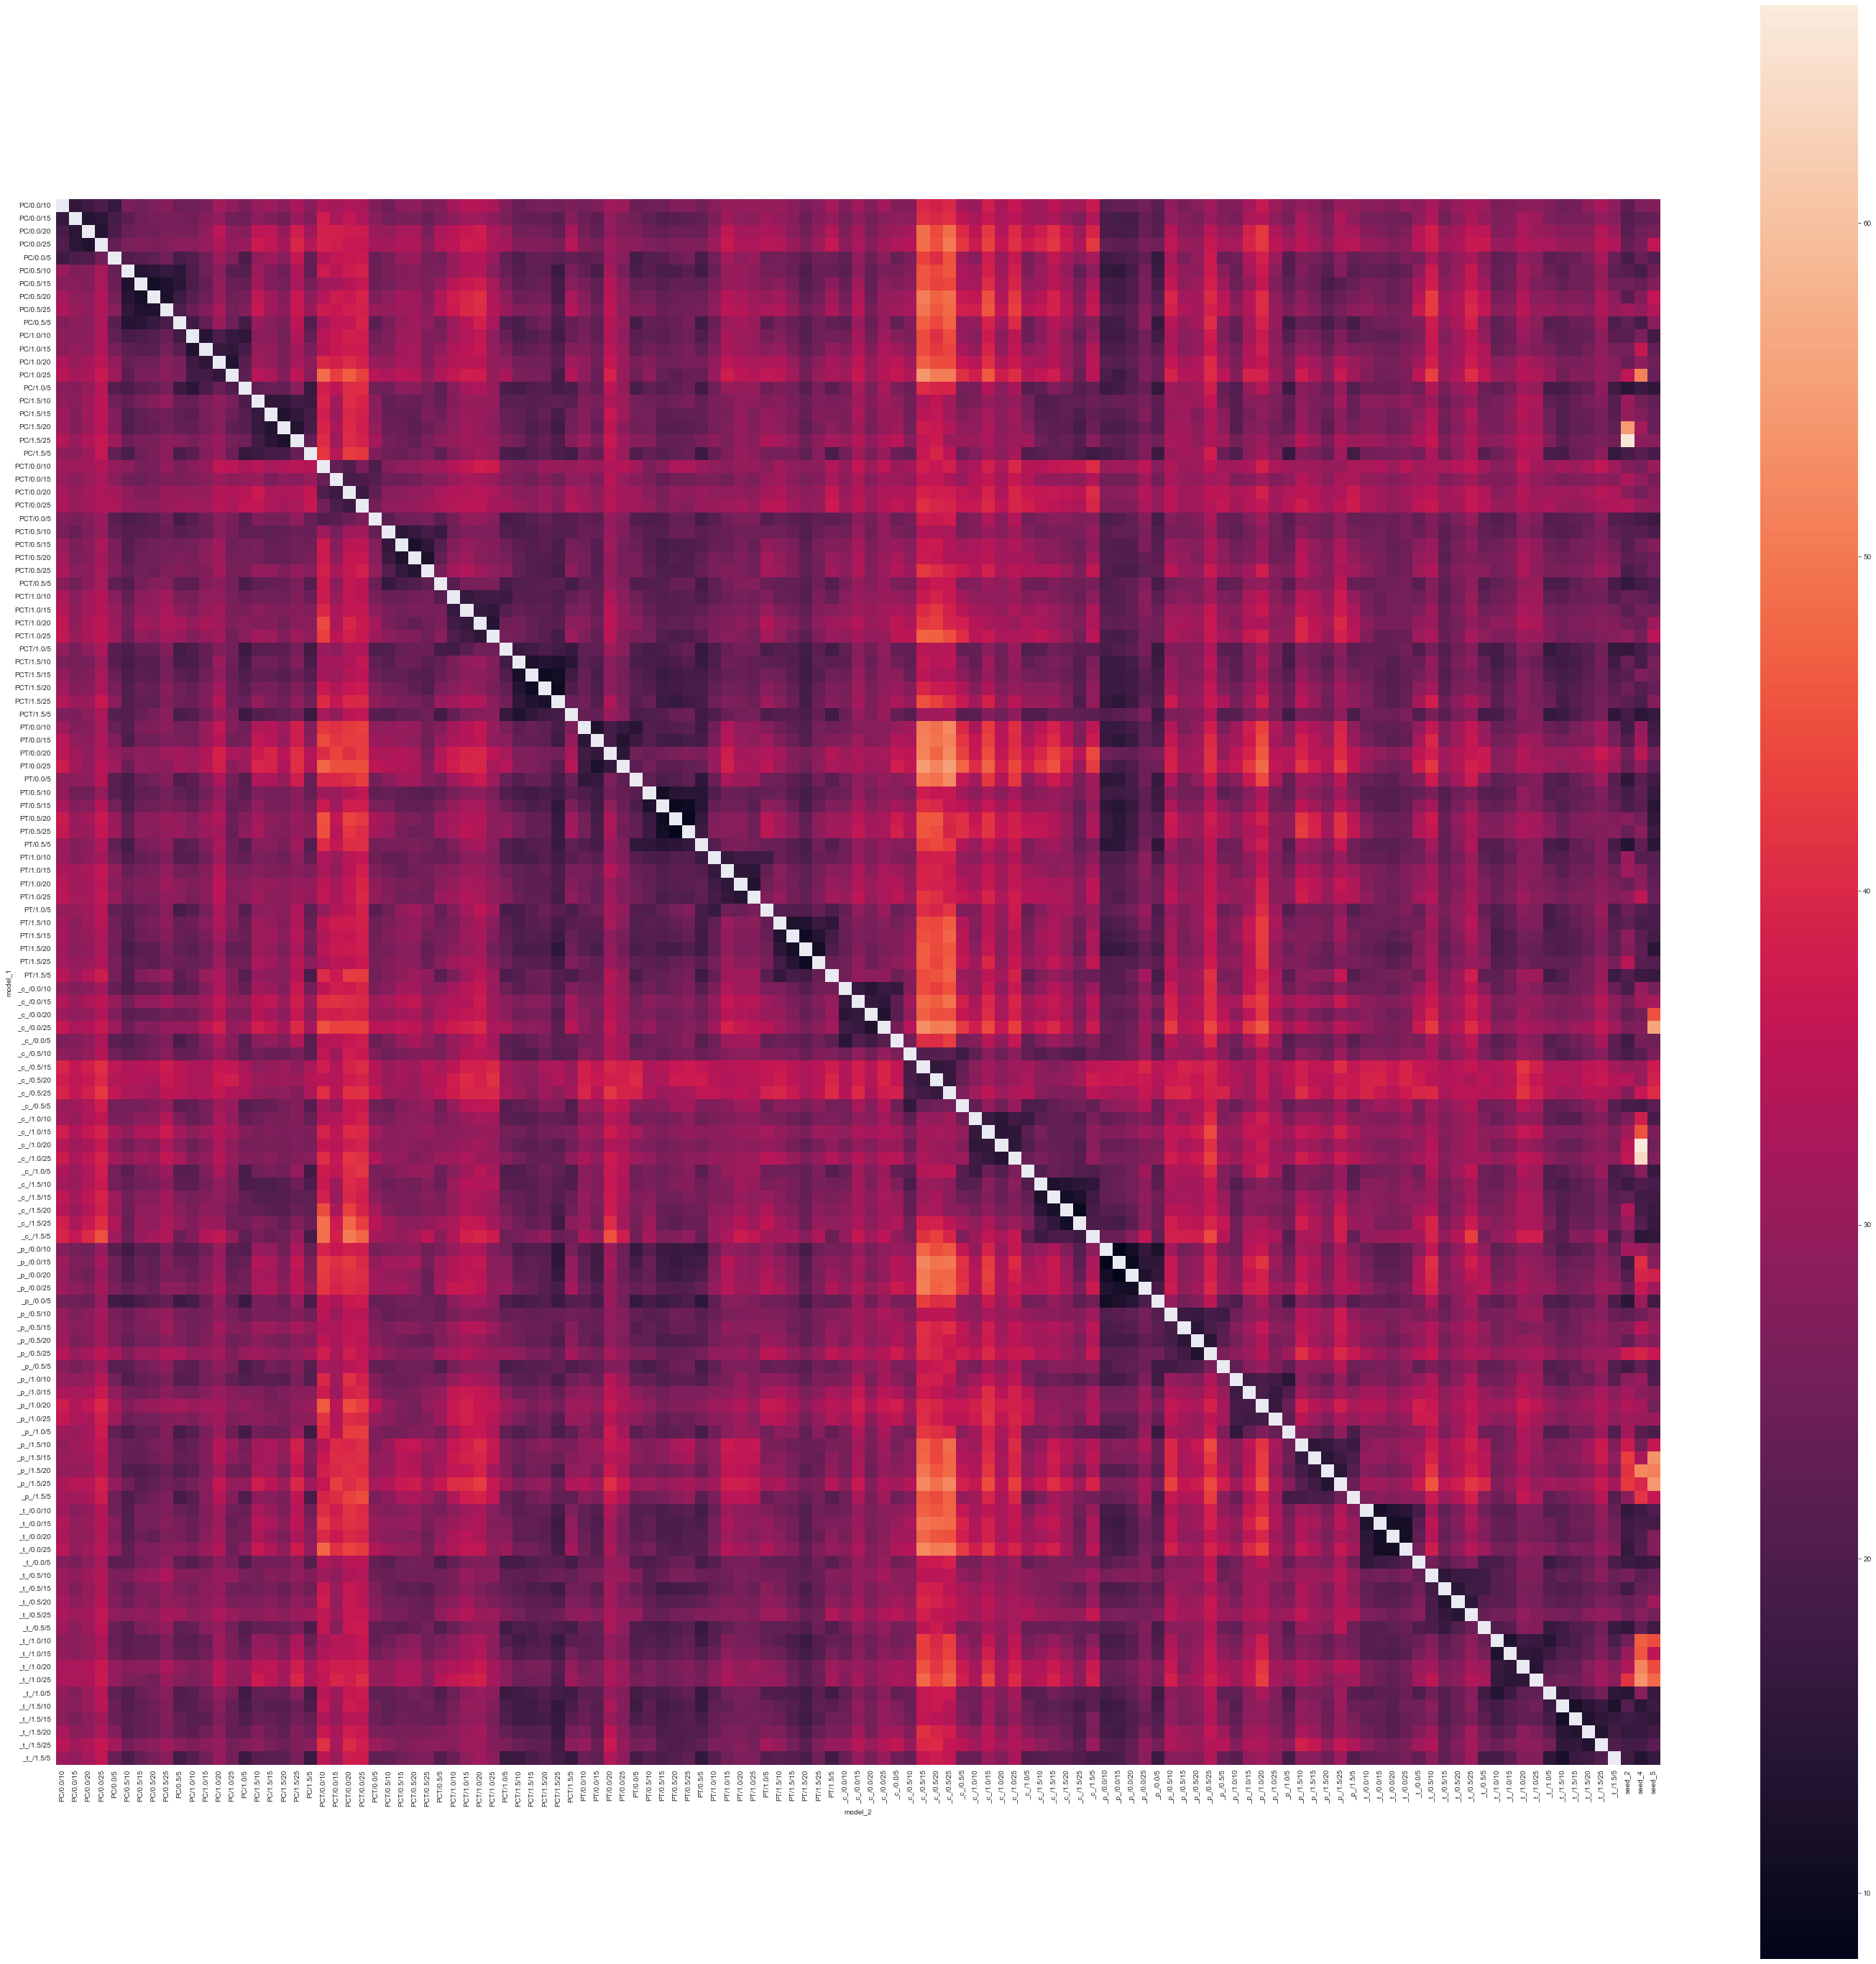

In [13]:
sns.set({'figure.figsize':(50, 50)})
pivoted = all_res[~all_res.model_1.str.endswith('/0') & ~all_res.model_2.str.endswith('/0')].sort_values(by=['model_1', 'model_2']).pivot(index='model_1', columns='model_2', values='kldiv')

del pivoted['seed_3']

sns.heatmap(
    pivoted,
    #annot=True,
    #cbar=False,
    square=True,
)

In [14]:
relevant_model = all_res[~all_res.model_1.str.endswith('/0') & ~all_res.model_2.str.endswith('/0')].reset_index()
def same(r):
    if r['model_1'].split('/')[0] == r['model_2'].split('/')[0] or r['model_2'].startswith('seed_'):
        return 'same'
    else:
        return 'diff'
groups = relevant_model.apply(same, axis=1)
relevant_model['grp'] = groups
grp_same = relevant_model[relevant_model['grp'] == 'same']['kldiv'].to_numpy()
grp_diff = relevant_model[relevant_model['grp'] == 'diff']['kldiv'].to_numpy()

In [15]:
u_res = scipy.stats.mannwhitneyu(grp_same, grp_diff, alternative='less')
u_res

MannwhitneyuResult(statistic=11472899.0, pvalue=1.8414743164814764e-140)

In [16]:
u_res.statistic / (grp_same.shape[0] * grp_diff.shape[0])

0.34640395531400964

In [48]:
relevant_model = shortlisted
relevant_model

model_1          model_2    kl_div  agreement  same task  \
0      C/0.0/none/10/3  C/0.0/none/10/4  7.682822   0.694416       True   
1      C/0.0/none/10/3  C/0.0/none/10/5  7.767683   0.692575       True   
2      C/0.0/none/10/3  C/0.0/none/20/1  8.302351   0.689124       True   
3      C/0.0/none/10/3  C/0.0/none/20/2  8.025766   0.699494       True   
4      C/0.0/none/10/3  C/0.0/none/20/3  6.543558   0.706675       True   
...                ...              ...       ...        ...        ...   
14275   T/1.5/none/5/5  T/1.5/none/20/5  8.909826   0.683157       True   
14276   T/1.5/none/5/5   T/1.5/none/5/1  7.156362   0.711126       True   
14277   T/1.5/none/5/5   T/1.5/none/5/2  7.015668   0.703832       True   
14278   T/1.5/none/5/5   T/1.5/none/5/3  7.043469   0.698886       True   
14279   T/1.5/none/5/5   T/1.5/none/5/4  6.753137   0.719768       True   

      task pair   grp  
0           C/C  same  
1           C/C  same  
2           C/C  same  
3           C/C  same  
4           C/C  same  
...         ...   ...  
14275       T/T  diff  
14276       T/T  diff  
14277       T/T  diff  
14278       T/T  diff  
14279       T/T  diff  

[14280 rows x 7 columns]

In [53]:
for task in sorted(relevant_model.model_1.str.split('/').apply(lambda cmp: cmp[0]).unique()):
    def same(row):
        return 'same' if (
            row['model_1'].startswith(task) and row['same task']
        ) else 'diff'
        
    groups = relevant_model.apply(same, axis=1)
    relevant_model['grp'] = groups
    grp_same = relevant_model[relevant_model['grp'] == 'same']['kl_div'].to_numpy()
    grp_diff = relevant_model[relevant_model['grp'] == 'diff']['kl_div'].to_numpy()
    u_res = scipy.stats.mannwhitneyu(grp_same, grp_diff, alternative='less')
    print(task, 'p-val:', u_res.pvalue, 'effect size:', u_res.statistic / (grp_same.shape[0] * grp_diff.shape[0]) * 100, '%')

C p-val: 2.1138596852665757e-101 effect size: 33.468818033381716 %
P p-val: 7.429344257475754e-257 effect size: 23.503436945653927 %
T p-val: 0.0 effect size: 8.423671585228188 %


In [54]:
import itertools

tasks = sorted(relevant_model.model_1.str.split('/').apply(lambda cmp: cmp[0]).unique())
task_pairs = [(a, b) for (a, b) in itertools.product(tasks, tasks) if a != b]
pair_index = {p: i for i, p in enumerate(task_pairs)}
Us = np.empty((len(pair_index), len(pair_index)))
ps = np.empty((len(pair_index), len(pair_index)))
fs = np.empty((len(pair_index), len(pair_index)))
def select(task_pair):
    task_1, task_2 = task_pair
    tasks_match = relevant_model.model_1.str.startswith(task_1) & relevant_model.model_2.str.startswith(task_2)
    multitask = relevant_model.model_1.str.contains('multitask') | relevant_model.model_2.str.contains('multitask')
    return relevant_model[tasks_match & ~multitask]['kl_div'].to_numpy()

for pair_a, pair_b in itertools.product(task_pairs, repeat=2):
    if pair_a == pair_b: 
        continue
    i, j = pair_index[pair_a], pair_index[pair_b]
    kldiv_a, kldiv_b = select(pair_a), select(pair_b)
    u_res = scipy.stats.mannwhitneyu(kldiv_a, kldiv_b)
    Us[i,j] = u_res.statistic
    ps[i,j] = u_res.pvalue
    fs[i,j] = u_res.statistic / (kldiv_a.shape[0] * kldiv_b.shape[0])

<AxesSubplot:>

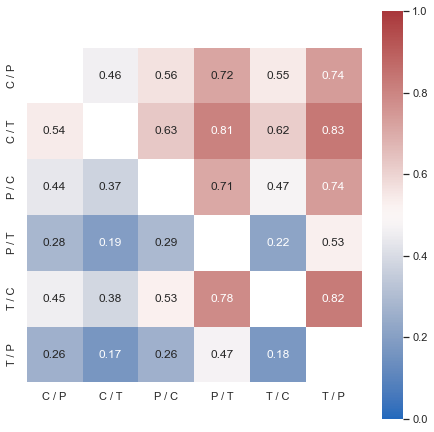

In [60]:
sns.set({'figure.figsize':(7.5, 7.5)})
cmap = sns.color_palette('vlag', as_cmap=True).copy()
cmap.set_bad('white')
sns.set(font_scale=1.0)
sns.heatmap(
    fs, 
    vmin=0, 
    vmax=1, 
    annot=True, 
    square=True, 
    xticklabels=list(map(' / '.join, task_pairs)), 
    yticklabels=list(map(' / '.join, task_pairs)),
    mask=(ps > 0.05) + np.eye(fs.shape[0]),
    cmap=cmap,
)

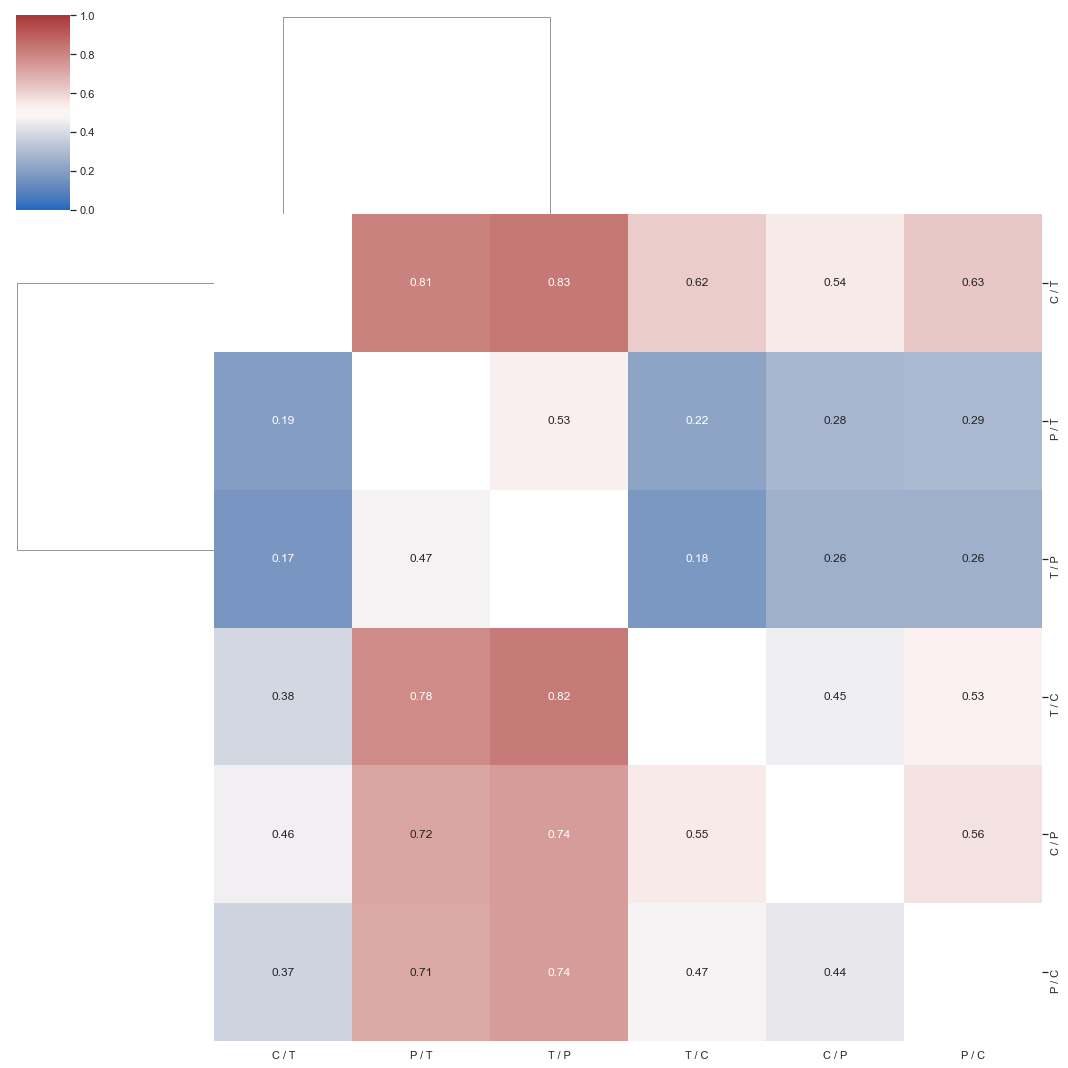

In [62]:
sns.set({'figure.figsize':(7.5, 7.5)})
sns.clustermap(
    fs, 
    vmin=0, 
    vmax=1, 
    annot=True, 
    square=True, 
    xticklabels=list(map(' / '.join, task_pairs)), 
    yticklabels=list(map(' / '.join, task_pairs)),
    mask=(ps > 0.05) + np.eye(fs.shape[0]),
    cmap=cmap,    
    figsize=(15, 15),
    metric='cityblock'
)

In [65]:
tasks = ['P', 'C', 'T']
task_pairs = [(a, b) for (a, b) in itertools.product(tasks, tasks) if a != b]
pair_index = {p: i for i, p in enumerate(task_pairs)}
Us = np.empty((len(pair_index), len(pair_index)))
ps = np.empty((len(pair_index), len(pair_index)))
fs = np.empty((len(pair_index), len(pair_index)))
def select(task_pair):
    task_1, task_2 = task_pair
    tasks_match = relevant_model.model_1.str.startswith(task_1) & relevant_model.model_2.str.startswith(task_2)
    multitask = relevant_model.model_1.str.contains('multitask') | relevant_model.model_2.str.contains('multitask')
    return relevant_model[tasks_match & ~multitask]['kl_div'].to_numpy()

for pair_a, pair_b in itertools.product(task_pairs, repeat=2):
    if pair_a == pair_b: 
        continue
    i, j = pair_index[pair_a], pair_index[pair_b]
    kldiv_a, kldiv_b = select(pair_a), select(pair_b)
    u_res = scipy.stats.mannwhitneyu(kldiv_a, kldiv_b)
    Us[i,j] = u_res.statistic
    ps[i,j] = u_res.pvalue
    fs[i,j] = u_res.statistic / (kldiv_a.shape[0] * kldiv_b.shape[0])

In [70]:
fs[np.diag_indices_from(fs)] = 0

/usr/lib/python3/dist-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


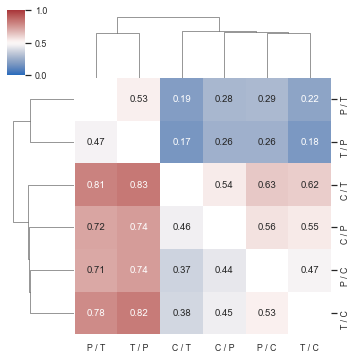

In [71]:
sns.set(font_scale=0.8)

sns.clustermap(
    fs, 
    vmin=0, 
    vmax=1, 
    annot=True, 
    square=True, 
    xticklabels=[' / '.join(t.strip('_').upper() for t in p) for p in task_pairs], 
    yticklabels=[' / '.join(t.strip('_').upper() for t in p) for p in task_pairs],
    mask=(ps > 0.05) + np.eye(fs.shape[0]),
    cmap=cmap,    
    figsize=(5, 5),
)

In [57]:
df_rsa = pd.read_csv('all-RSA.csv')
#df_rsa['model1'] = df_rsa.model1.apply(lambda s: shortform(s, as_str=True, lowercase_monotask=True))
#df_rsa['model2'] = df_rsa.model2.apply(lambda s: shortform(s, as_str=True, lowercase_monotask=True))
for modelkey in ['model1', 'model2']:
    df_rsa[modelkey] = df_rsa[modelkey].apply(lambda name: name[:-1] + '05' if name.endswith('/5') else name)
df_rsa

model1                   model2   rsa_rho  rsa_pval
0      PCT/1.0/multimodal/1/10  PCT/1.0/multimodal/1/25  0.888858       0.0
1      PCT/1.0/multimodal/1/25  PCT/1.0/multimodal/1/10  0.888858       0.0
2      PCT/1.0/multimodal/1/10  PCT/1.0/multimodal/1/15  0.921315       0.0
3      PCT/1.0/multimodal/1/15  PCT/1.0/multimodal/1/10  0.921315       0.0
4      PCT/1.0/multimodal/1/10  PCT/1.0/multimodal/1/05  0.840412       0.0
...                        ...                      ...       ...       ...
20587   PC/0.5/multimodal/1/15   PC/0.5/multimodal/1/05  0.832863       0.0
20588   PC/0.5/multimodal/1/05    PC/0.5/multimodal/1/0  0.559178       0.0
20589    PC/0.5/multimodal/1/0   PC/0.5/multimodal/1/05  0.559178       0.0
20590   PC/0.5/multimodal/1/15    PC/0.5/multimodal/1/0  0.379380       0.0
20591    PC/0.5/multimodal/1/0   PC/0.5/multimodal/1/15  0.379380       0.0

[20592 rows x 4 columns]

In [58]:
selected = (
    df_rsa.model1.apply(lambda s: int(s.split('/')[-1]) != 0) & 
    df_rsa.model2.apply(lambda s: int(s.split('/')[-1]) != 0) &
    ~df_rsa.model1.str.contains('multitask') &
    ~df_rsa.model2.str.contains('multitask') 
)

<AxesSubplot:xlabel='model2', ylabel='model1'>

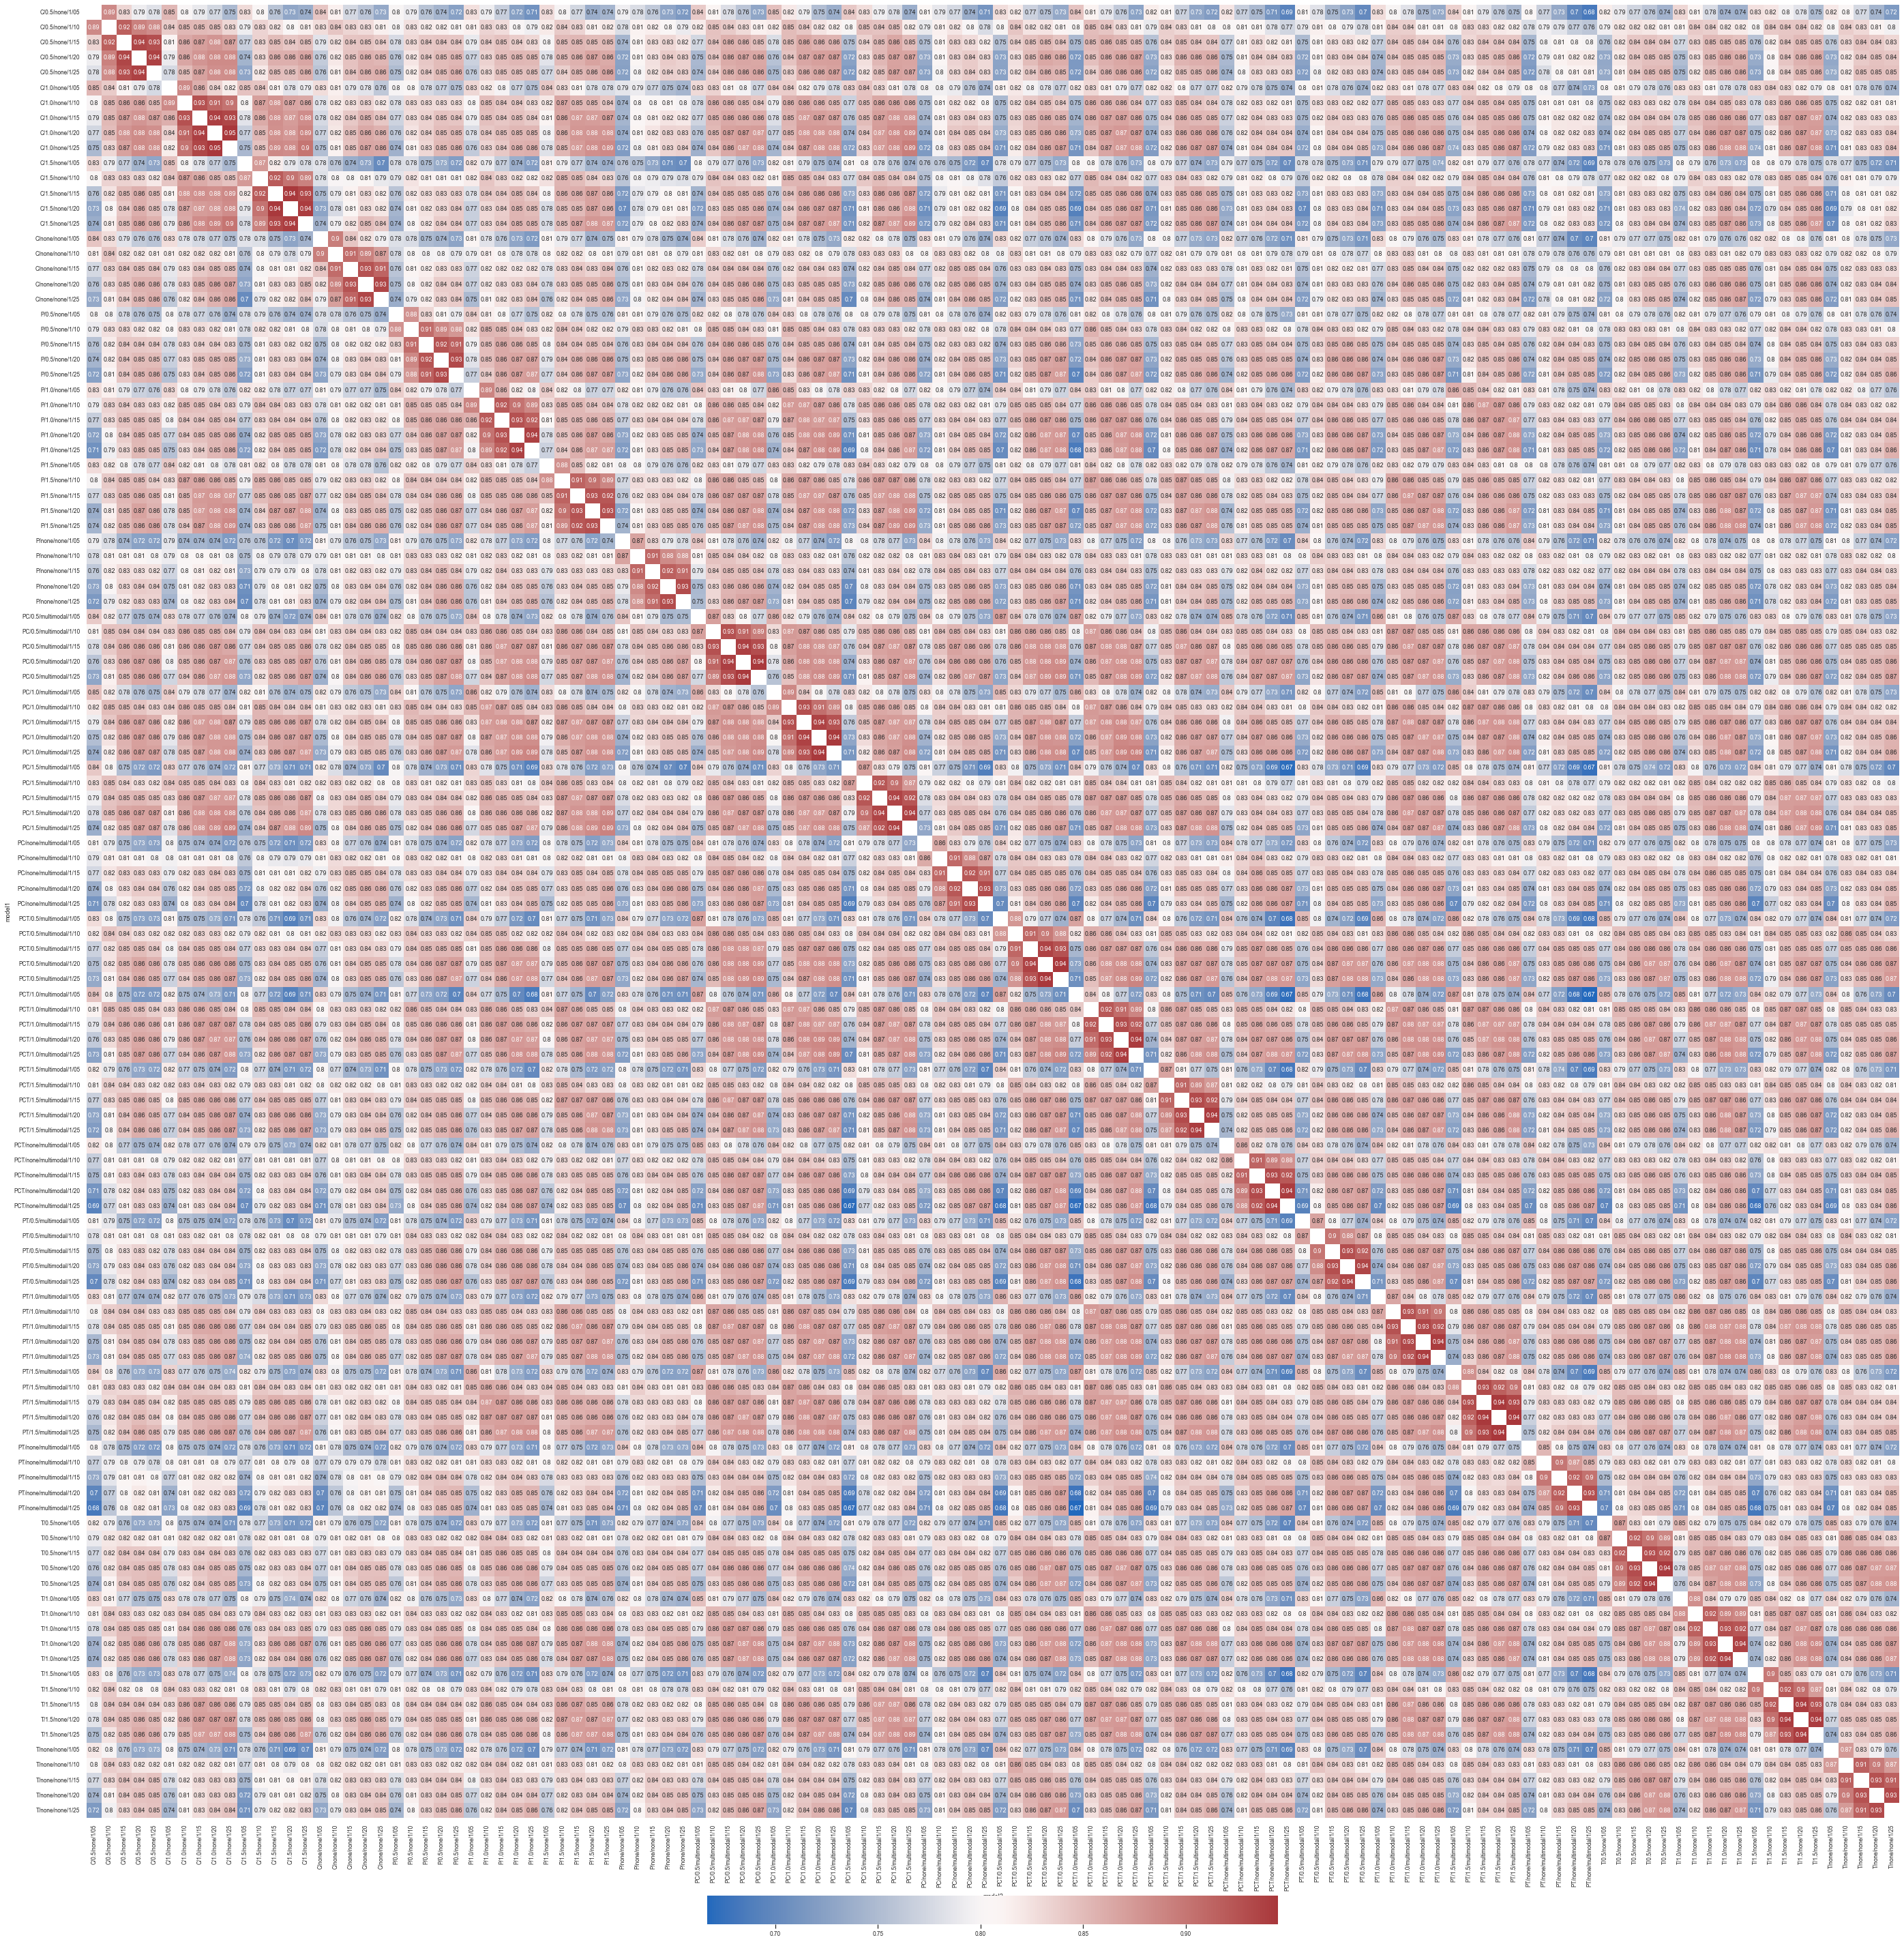

In [59]:
rho = df_rsa[selected].pivot(index='model1', columns='model2', values='rsa_rho')
pval = df_rsa[selected].pivot(index='model1', columns='model2', values='rsa_pval').to_numpy()
sns.set(font_scale=.75, rc={'figure.figsize':(60,60)})
sns.heatmap(
    rho, 
    annot=True, 
    square=True,
    mask=(pval > 0.05),
    cmap=cmap,
    cbar_kws=dict(use_gridspec=False,location="bottom",pad=0.035,shrink=0.25)
)

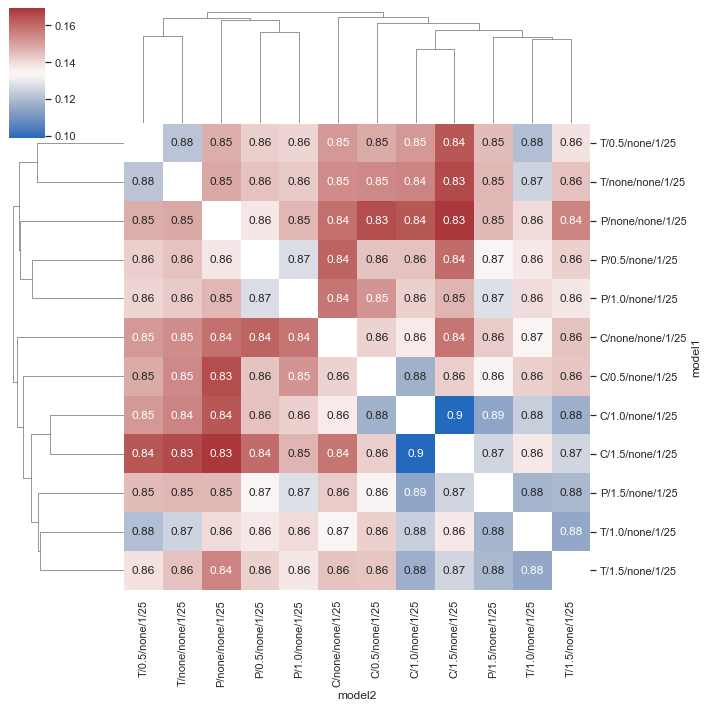

In [73]:
selected = (
    df_rsa.model1.apply(lambda s: int(s.split('/')[-1]) != 0) & 
    df_rsa.model2.apply(lambda s: int(s.split('/')[-1]) != 0) &
    ~df_rsa.model1.str.contains('multi') &
    ~df_rsa.model2.str.contains('multi') &
    df_rsa.model1.str.endswith('/25') &
    df_rsa.model2.str.endswith('/25')
)
rho = df_rsa[selected].pivot(index='model1', columns='model2', values='rsa_rho').fillna(1.0)
pval = df_rsa[selected].pivot(index='model1', columns='model2', values='rsa_pval').to_numpy()
sns.set(font_scale=1.0, rc={'figure.figsize':(25,25)})
sns.clustermap(
    1 - rho, 
    annot=rho, 
    square=True,
    mask=(pval > 0.05) + np.eye(pval.shape[0]),
    cmap=cmap,
)